##The goal of this walkthrough is to see how PhasePlot can be a useful tool for understanding data

In [1]:
import sys
import numpy as np
import yt


In [2]:
#I found that if I try to add a new variable I have to rerun the whole notebook.
def metfrac(field,data):
    return data['Metal_Density']/data['density'] 
def znew(field,data):
    return data['z'] - ds.quan(0.53,'code_length')
def absznew(field,data):
    return np.abs(data['z'] - ds.quan(0.53,'code_length'))

In [3]:
#Load our data:
ds = yt.load("DD0044/DD0044")
#ds = yt.load_sample("HiresIsolatedGalaxy")

yt : [INFO     ] 2020-03-24 13:54:06,526 Parameters: current_time              = 0.044000089990001
yt : [INFO     ] 2020-03-24 13:54:06,530 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2020-03-24 13:54:06,534 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2020-03-24 13:54:06,537 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2020-03-24 13:54:06,547 Parameters: cosmological_simulation   = 0.0


In [4]:
#If we want to understand what variables are in our data we can look here:
#for field in ds.fields.gas:
#    print(field)

In [5]:
#Now that I have loaded my data I need to add those variables as new fields
ds.add_field(('gas','metf'),function=metfrac)
ds.add_field(('gas','zdisk'),function=znew,units='code_length')
ds.add_field(('gas','abszdisk'),function=absznew,units='code_length')

Parsing Hierarchy : 100%|██████████| 886/886 [00:00<00:00, 14259.06it/s]
yt : [INFO     ] 2020-03-24 13:55:00,729 Gathering a field list (this may take a moment.)
/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  
/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  after removing the cwd from sys.path.


yt : [INFO     ] 2020-03-24 13:55:39,717 Projection completed
yt : [INFO     ] 2020-03-24 13:55:39,740 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 13:55:39,743 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 13:55:39,745 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 13:55:39,747 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 13:55:39,768 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



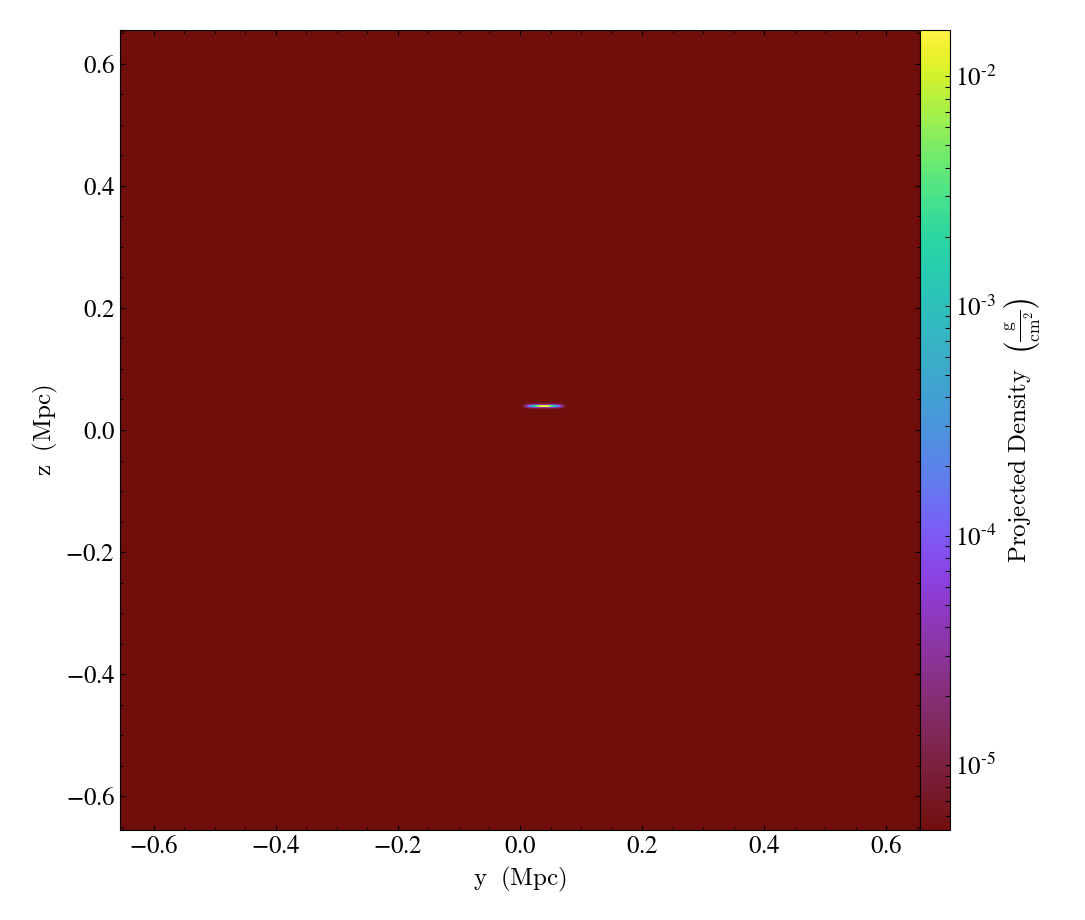

In [6]:
#Let's just take a look:
yt.ProjectionPlot(ds,"x","density")

In [7]:
#So things that I think about have to do with what gas is doing in the disk
#If we are going to focus on the disk let's select that region:
disku = ds.disk([0.53,0.53,0.53],[0,0,1.0],(50,"kpc"),(5,"kpc"))
#regu = ds.box([0.4,0.4,0.24],[0.6,0.6,0.26])

yt : [INFO     ] 2020-03-24 14:01:36,083 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:01:36,085 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:01:36,087 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:01:36,090 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:01:36,105 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



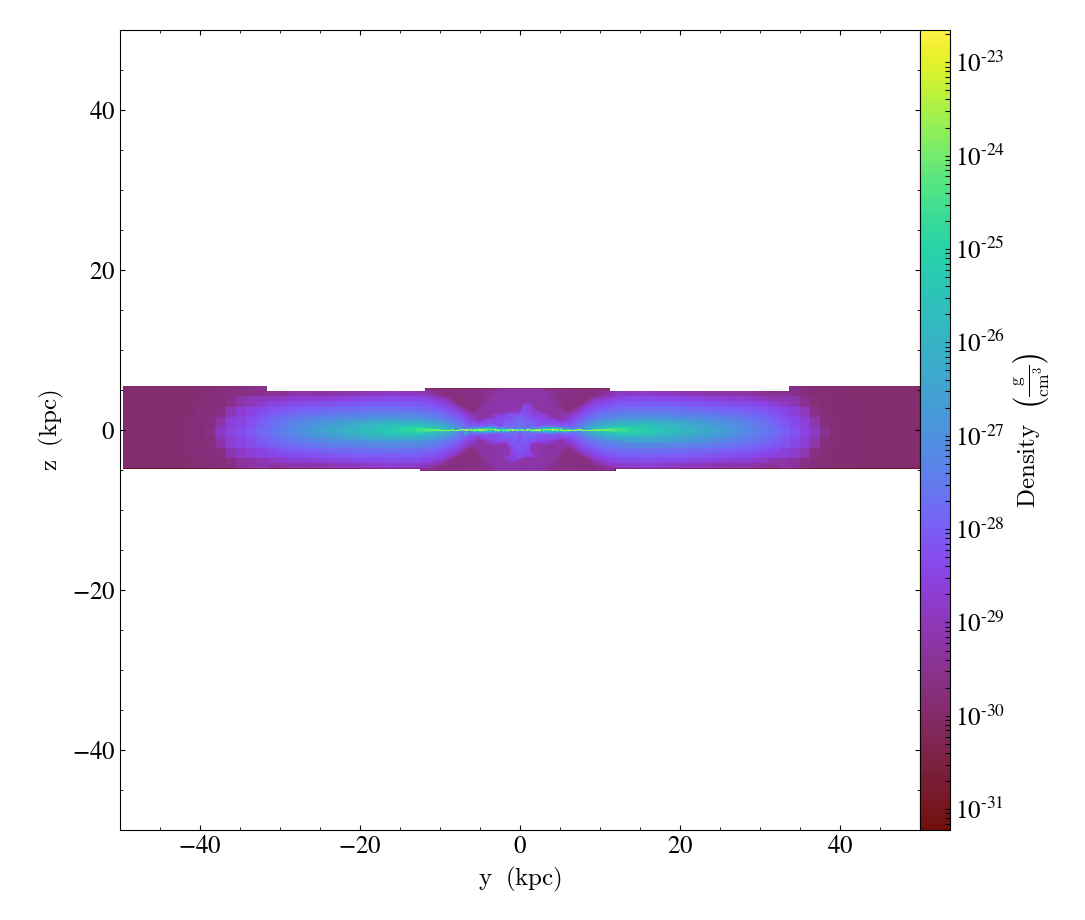

In [10]:
#Now we can take another look:
yt.SlicePlot(ds,"x","density",data_source=disku,center=(0.53,0.53,0.53),width=(100,'kpc'))

yt : [INFO     ] 2020-03-24 14:00:33,921 Projection completed
yt : [INFO     ] 2020-03-24 14:00:33,923 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:00:33,924 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:00:33,927 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:00:33,932 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-24 14:00:33,936 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



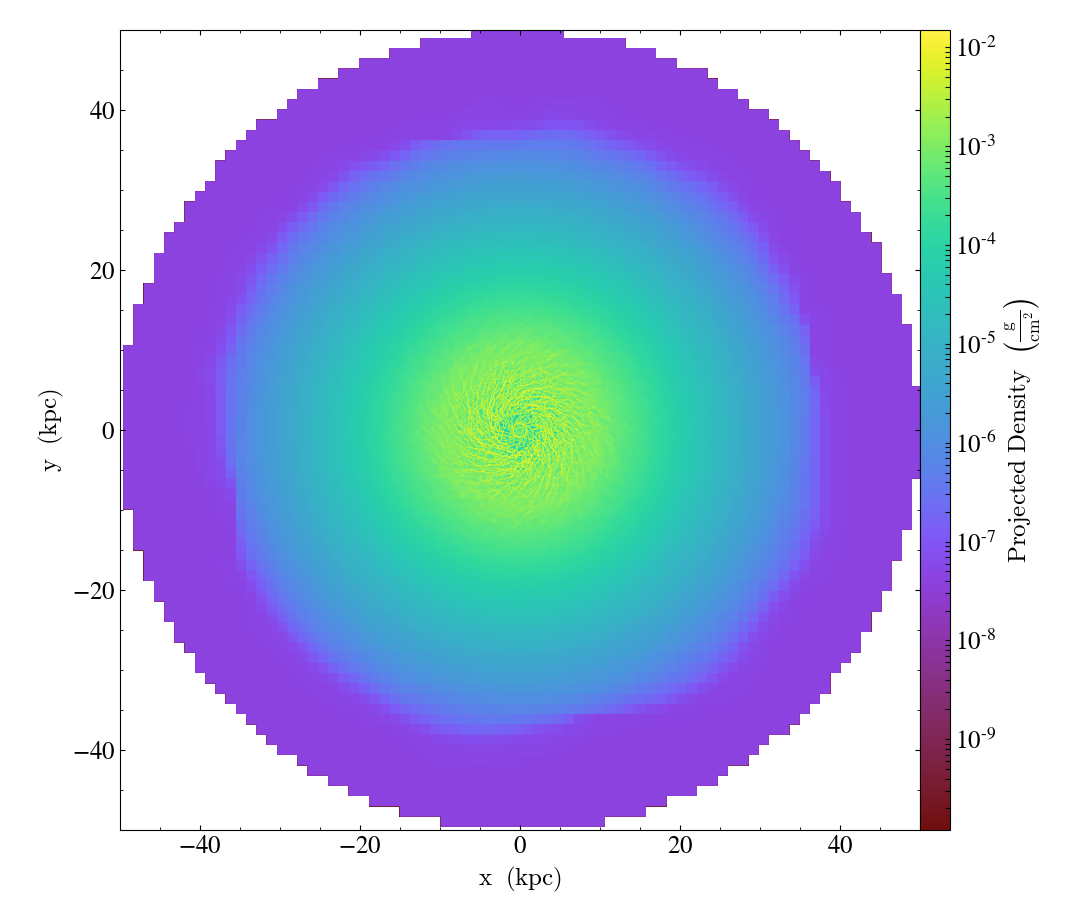

In [9]:
#And here is a look at all the data we selected:
yt.ProjectionPlot(ds,"z","density",data_source=disku,center=[0.53,0.53,0.53],width=(100,"kpc"))


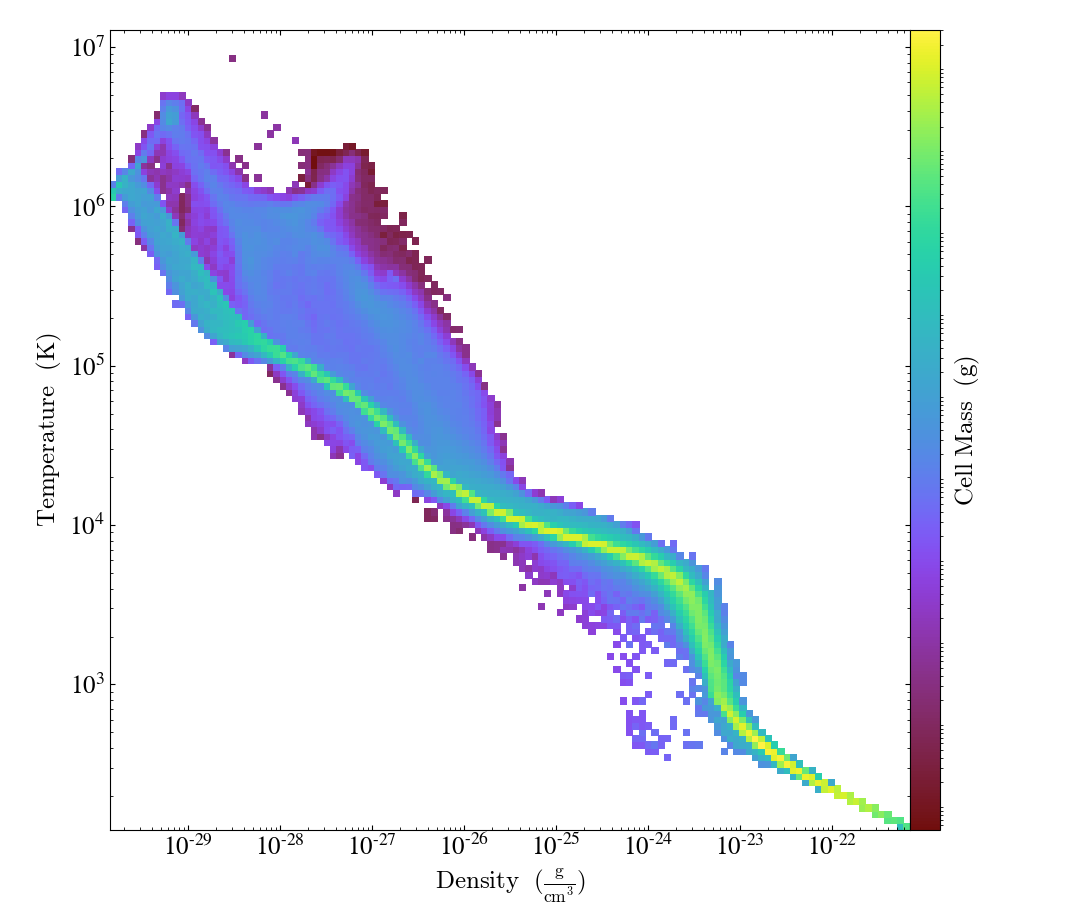

In [11]:
#Okay, so what kind of gas is in this disk?  Let's take a look at the rho-T distribution:
yt.PhasePlot(disku,"density","temperature",["cell_mass"],weight_field=None)
#yt.PhasePlot(ds,"density","temperature",["cell_mass"],weight_field=None)
#dd = ds.all_data()
#yt.PhasePlot(dd,"density","temperature",["cell_mass"],weight_field=None)
#note, unlike with ProjectionPlot, I can't use "ds".  Need to use a selected region.  Why?


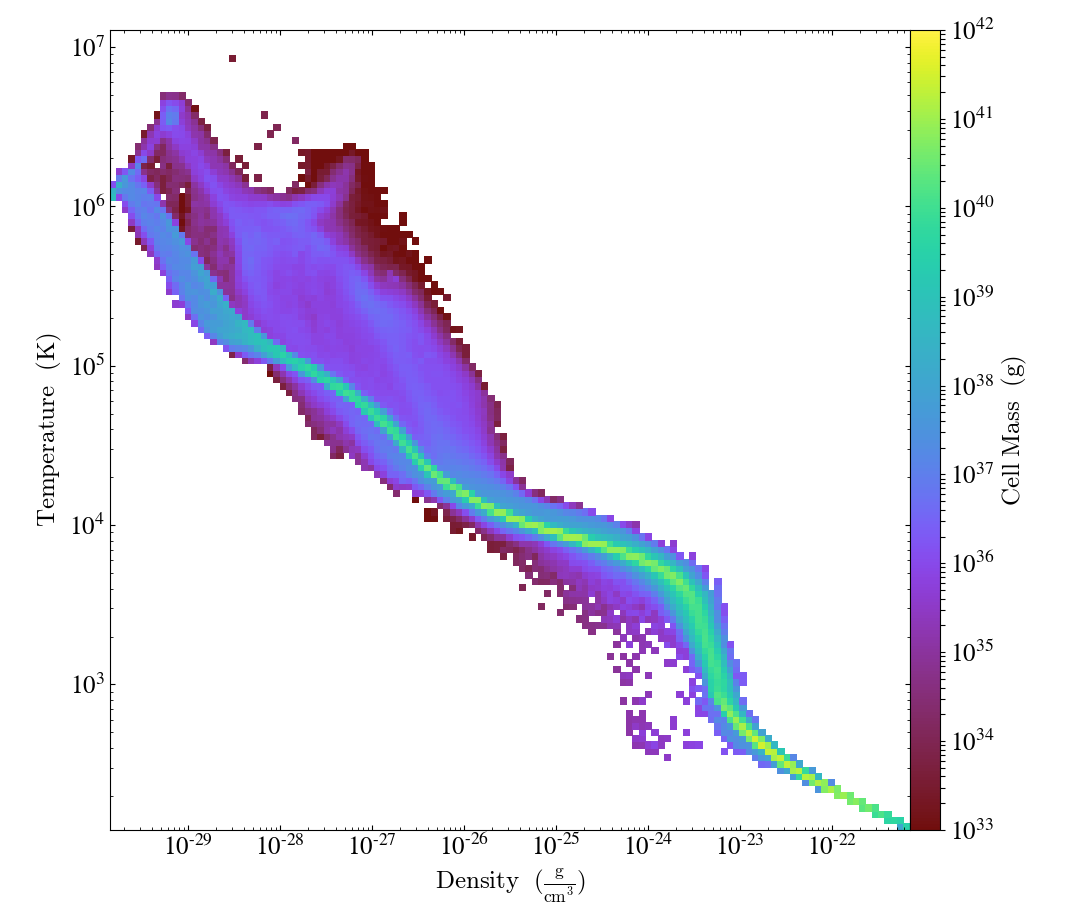

In [12]:
#Ugh!  Why is this not labeling the cell mass range?!  
#Turns out if the range is too high the Phaseplot colorbar is sometimes against labels...
#Maybe I can force it...

plot = yt.PhasePlot(disku,"density","temperature",["cell_mass"],weight_field=None)
plot.set_zlim("cell_mass",1e33,1e42)


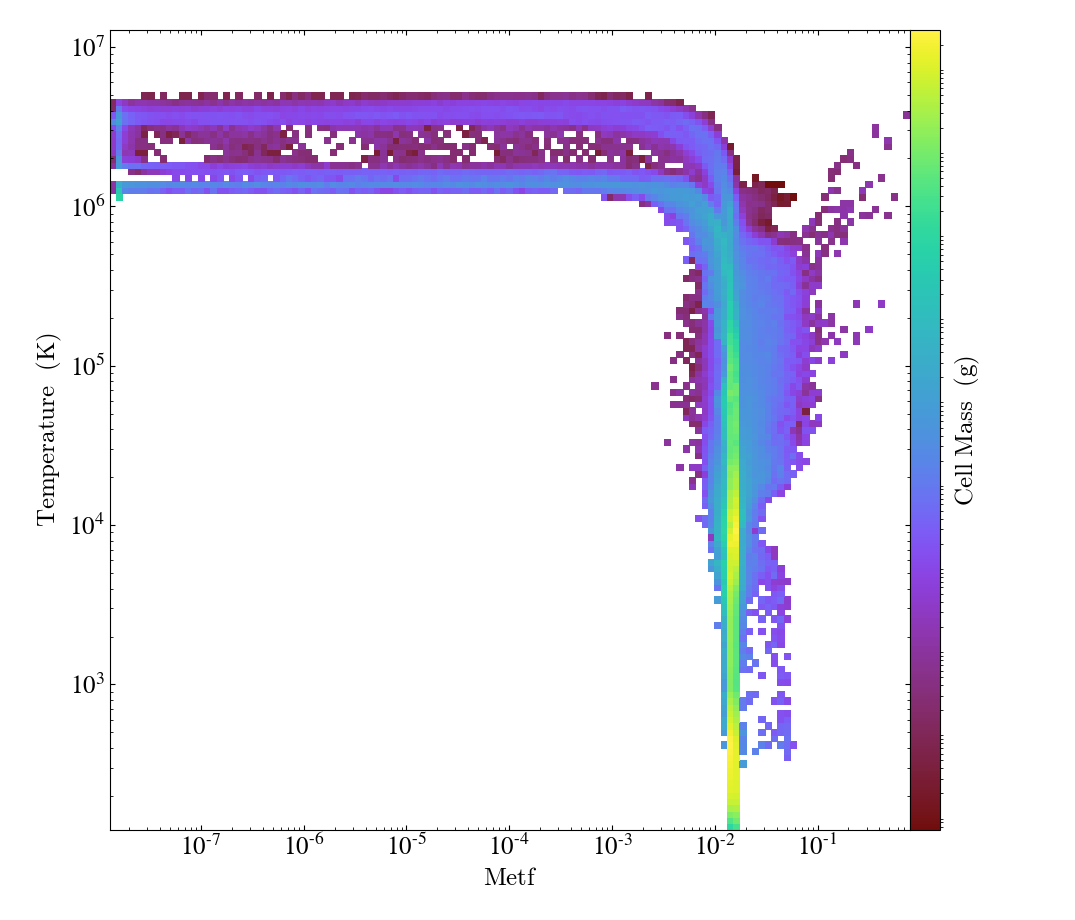

In [13]:
#I think I am including a lot of gas that is not in the disk.  Can I get rid of it?
yt.PhasePlot(disku,"metf","temperature",["cell_mass"],weight_field=None)


In [ ]:
#What should we use to get rid of gas outside the disk?

In [ ]:
#If I wanted I could take a look at a slice to really see what I am removing
#yt.SlicePlot(ds,"z","metf",data_source=disku,center=(0.53,0.53,0.53),width=(70,'kpc'))
#plt.set_zlim("metf",0.01,0.011)

In [14]:
#So I can pretty safely get rid of all gas with metf < 2e-3
diskchoose = disku.cut_region(["obj['metf'] > 0.002"])



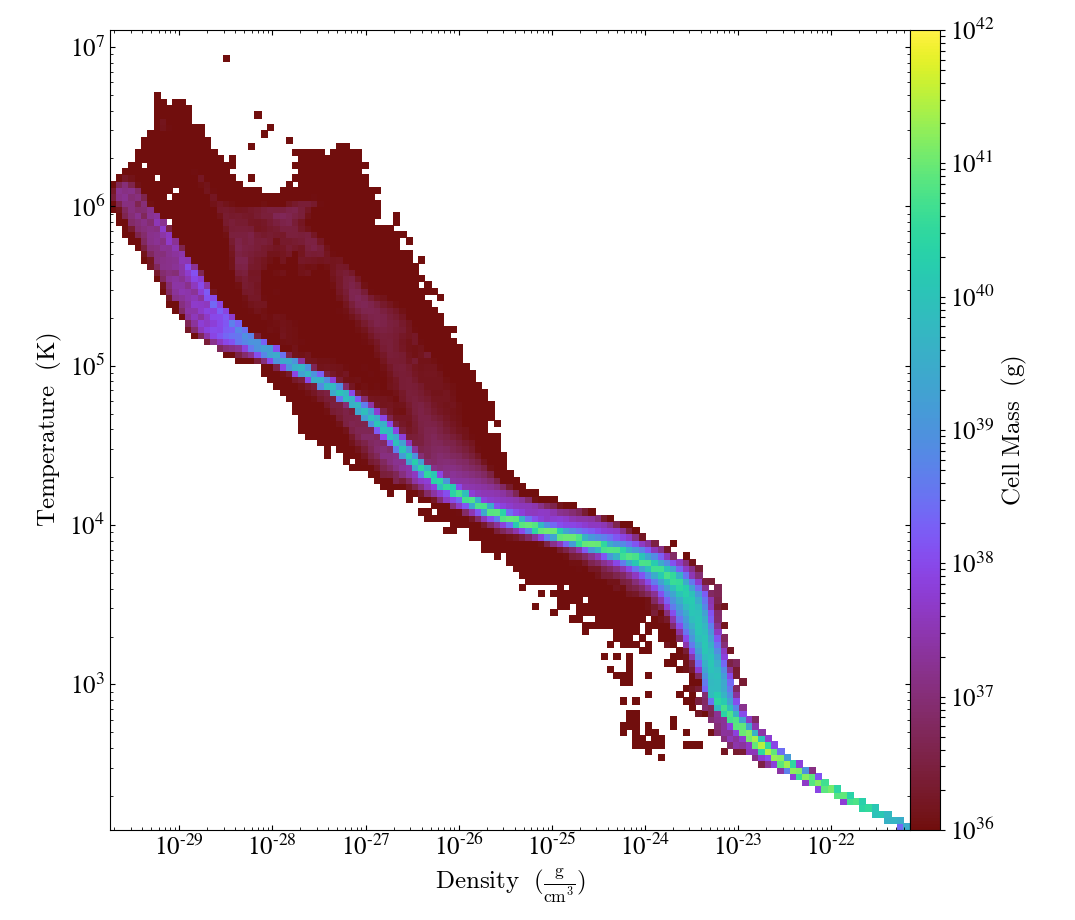

In [16]:
#Okay, now we can take a look at this more finely selected gas:
plot = yt.PhasePlot(diskchoose,"density","temperature",["cell_mass"],weight_field=None)
#plot.set_zlim("cell_mass",1e33,1e42)

#Wow, that is showing me bins with LESS than a solar mass, that is way too little gas for me to care about!
#Can I get rid of this small fraction of mass by fiddling with zlim?:

plot.set_zlim("cell_mass",1e36,1e42)


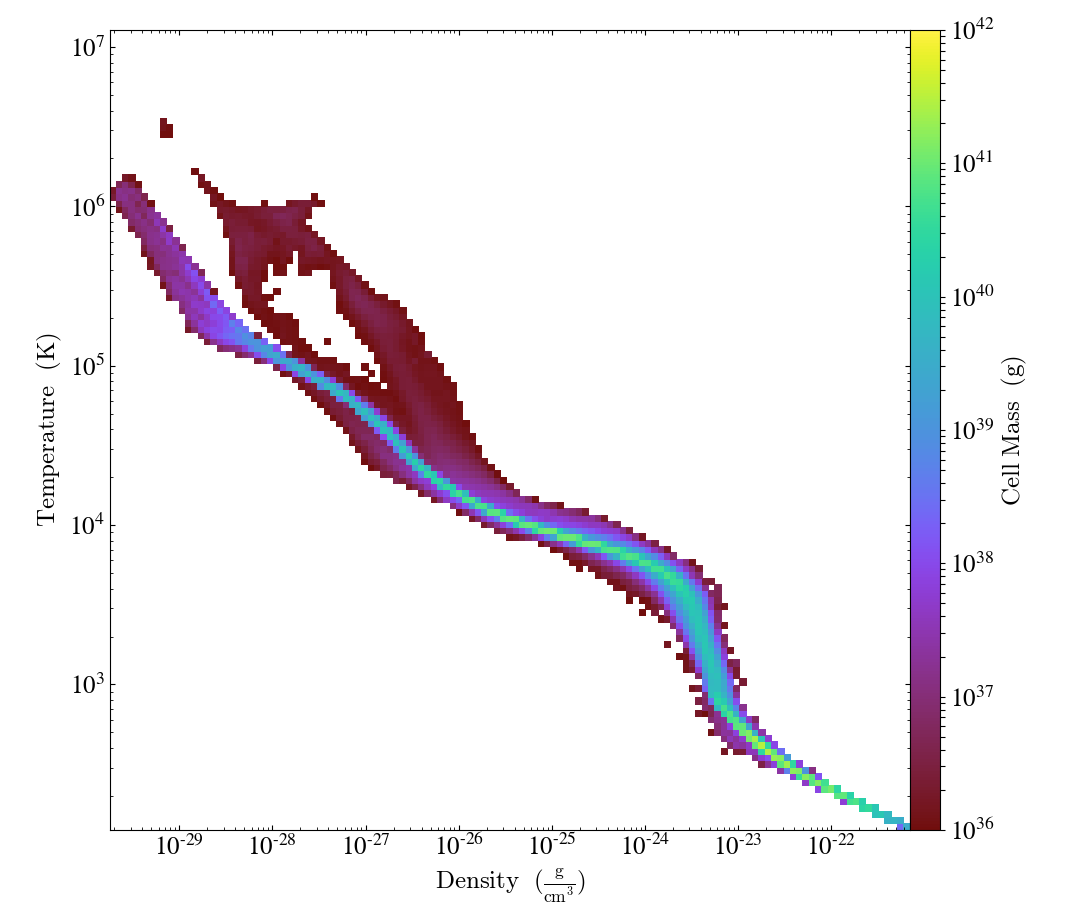

In [17]:
#That did not actually clean up my phaseplot.  
#To do that I have to reach right into the histogram-->use create_profile:

profile = yt.create_profile(diskchoose, ['density','temperature'], 'cell_mass',n_bins=128,weight_field=None)
histogram = profile.field_data['gas','cell_mass']
histogram[histogram < 1e36] = 0 
plot3 = yt.PhasePlot.from_profile(profile)
plot3.set_zlim('cell_mass',1e36,1e42)


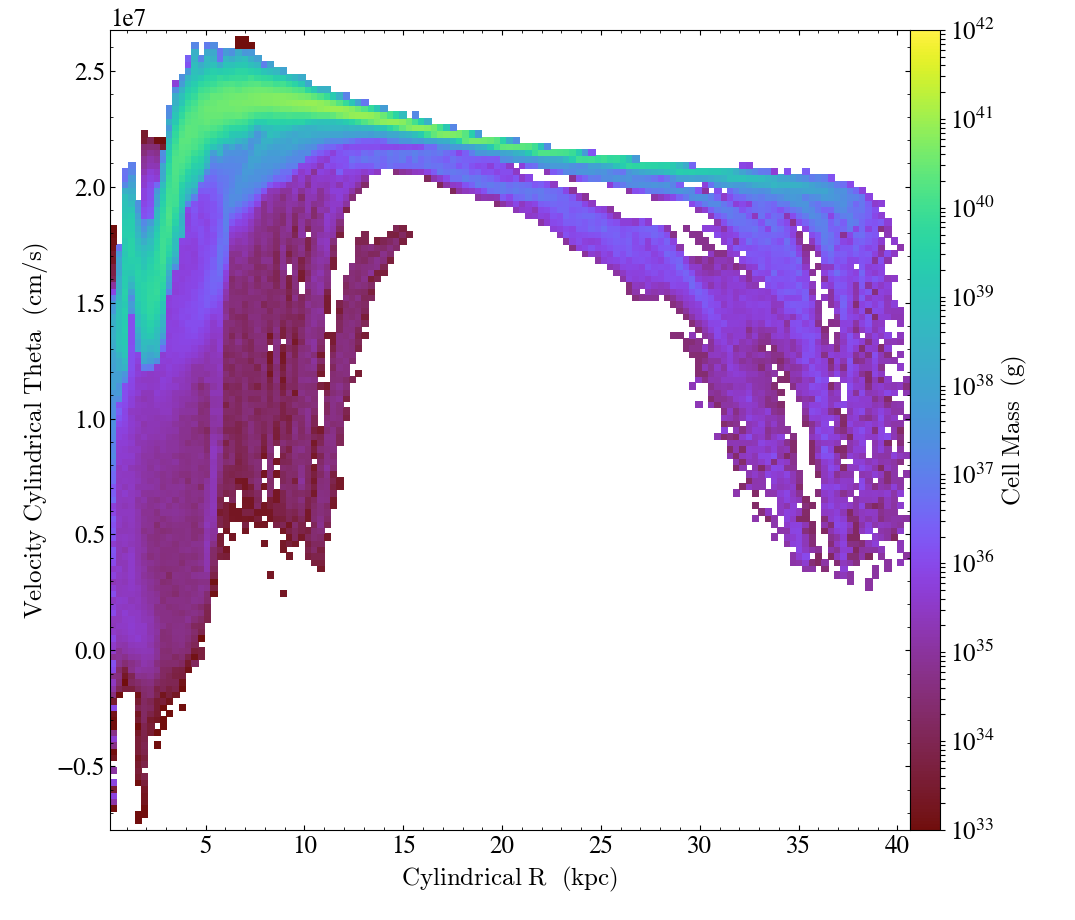

In [18]:
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["cell_mass"],weight_field=None)
plot.set_zlim("cell_mass",1e33,1e42)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
#plot.set_zlim("cell_mass",1e36,1e42)


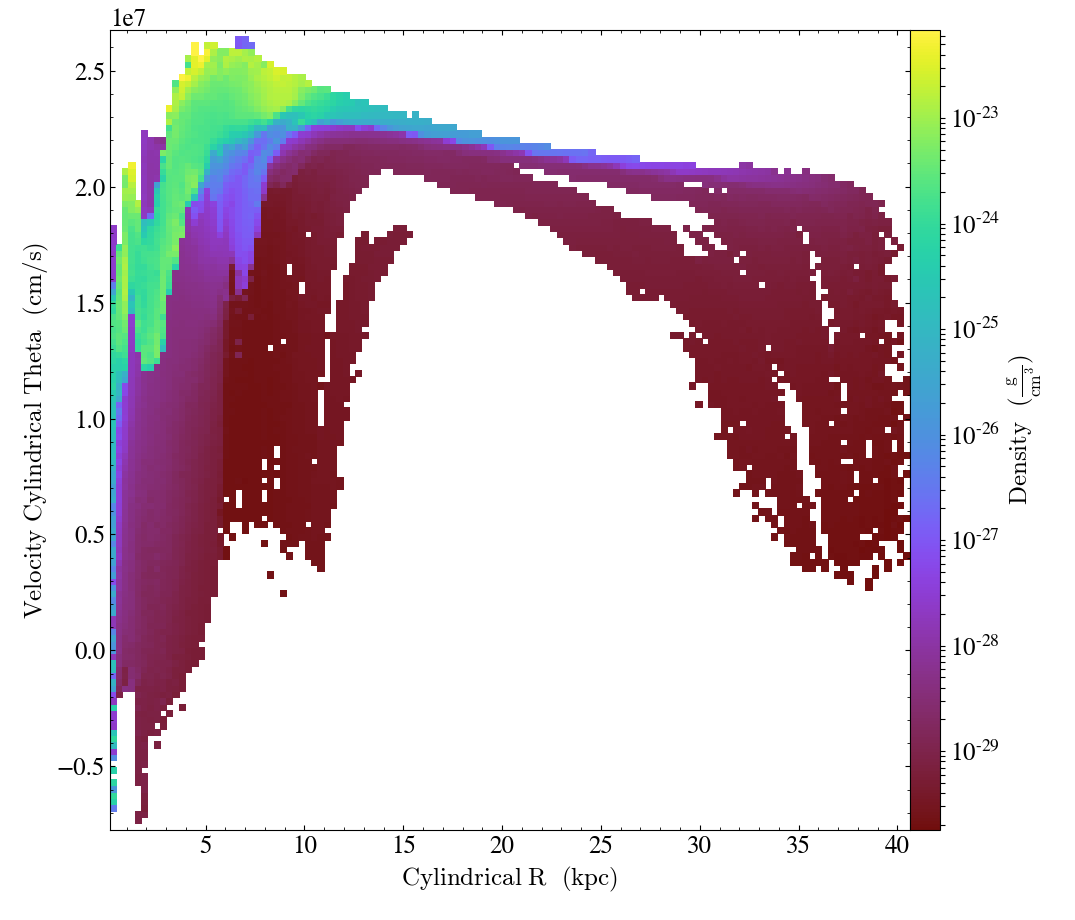

In [19]:
#Let's see why we have such a spread
#Is it that different density gas is moving at different velocities?
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["density"],weight_field="ones")
#plot.set_zlim("cell_mass",1e33,1e42)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)

/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/visualization/plot_container.py:117: RuntimeWarning: invalid value encountered in log10
  expA = np.floor(np.log10(vmin))



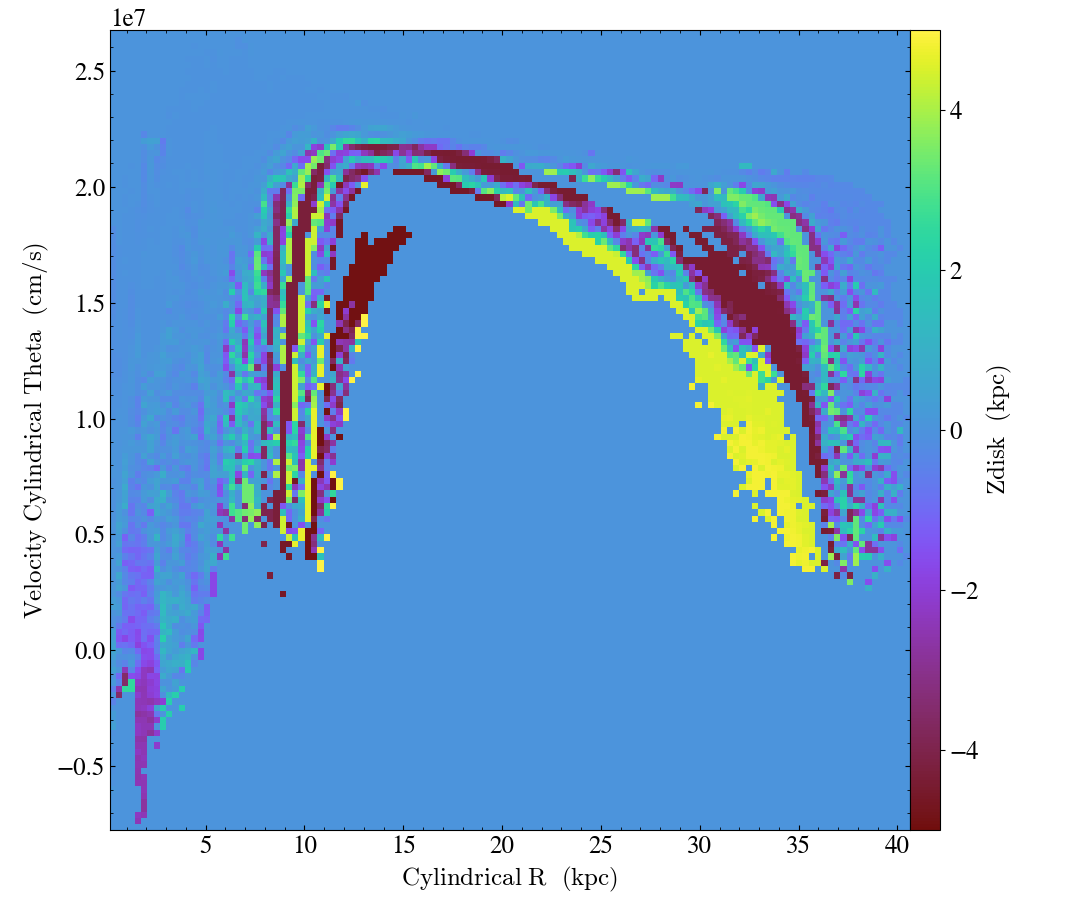

In [20]:
#I feel like this could also be related to the disk height...
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["zdisk"],weight_field="ones")
plot.set_unit("zdisk","kpc")
plot.set_zlim("zdisk",-5,5)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
plot.set_log('zdisk',False)



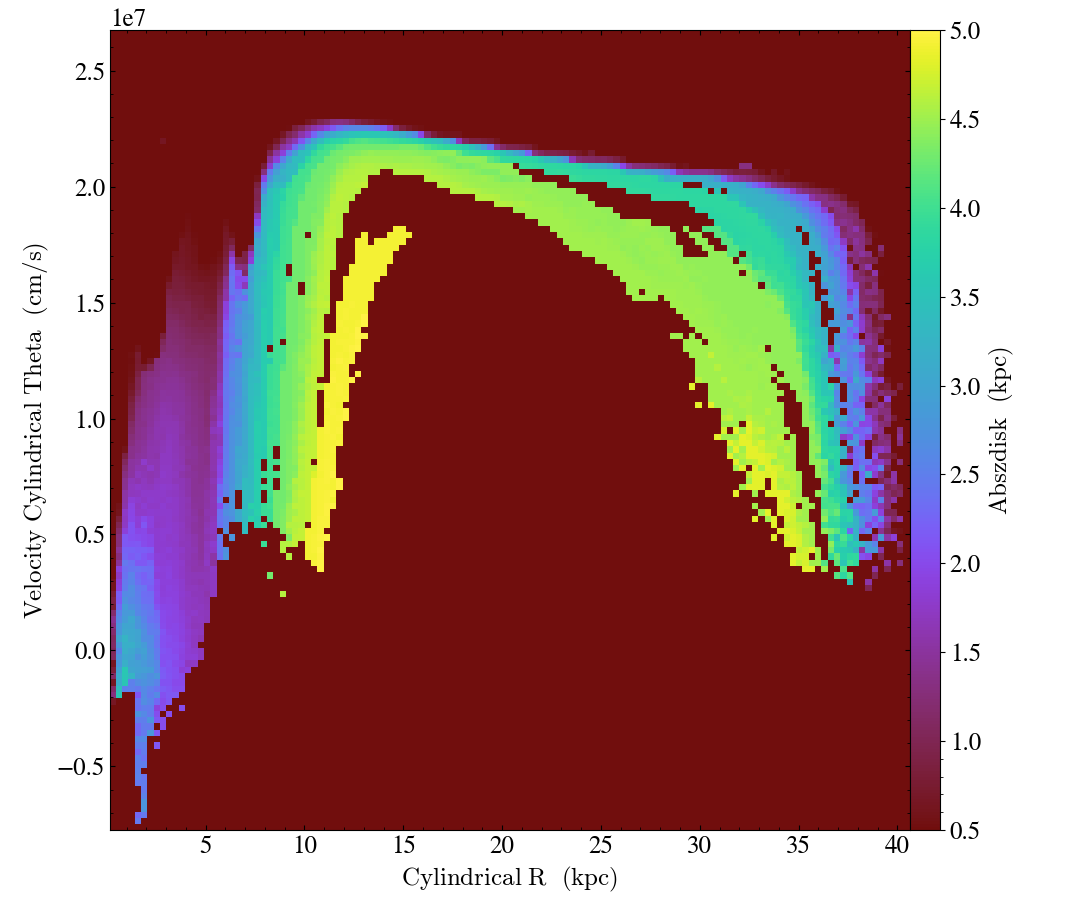

In [21]:
#The values outside are set to 0, so let's see if we can fix that by setting better limits
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["abszdisk"],weight_field="ones")
plot.set_unit("abszdisk","kpc")
plot.set_zlim("abszdisk",0.5,5)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
plot.set_log('abszdisk',False)


In [ ]:
#Finally, the other great thing about using create_profile is n_bins:
#disksmall = ds.disk([0.53,0.53,0.53],[0,0,1.0],(3,"kpc"),(5,"kpc"))
profile = yt.create_profile(diskchoose,["cylindrical_r","velocity_cylindrical_theta"], 'abszdisk',n_bins=128,weight_field="ones")
histogram = profile.field_data['gas','abszdisk']
histogram[histogram < 1e34] = 0 
plot3 = yt.PhasePlot.from_profile(profile)
plot3.set_zlim('cell_mass',1e34,1e42)
plot3.set_unit("cylindrical_r","kpc")
plot3.set_log('cylindrical_r',False)
plot3.set_log('velocity_cylindrical_theta',False)

In [ ]:
#Okay, well we definitely see a relationship, 
#although I am still stumped on how to make the colors look the way I want 
#(have all the unselected cells be white, for example).
#With more time, we could see how cleanly density and abszdisk line up, with maybe a dash of radius thrown in!
#Phaseplots are so versatile!


In [ ]:
#See if you can make a Phaseplot telling you how cleanly density and z-height line up
#See if you can throw radius in there so see whether density cares more about z-height or radius


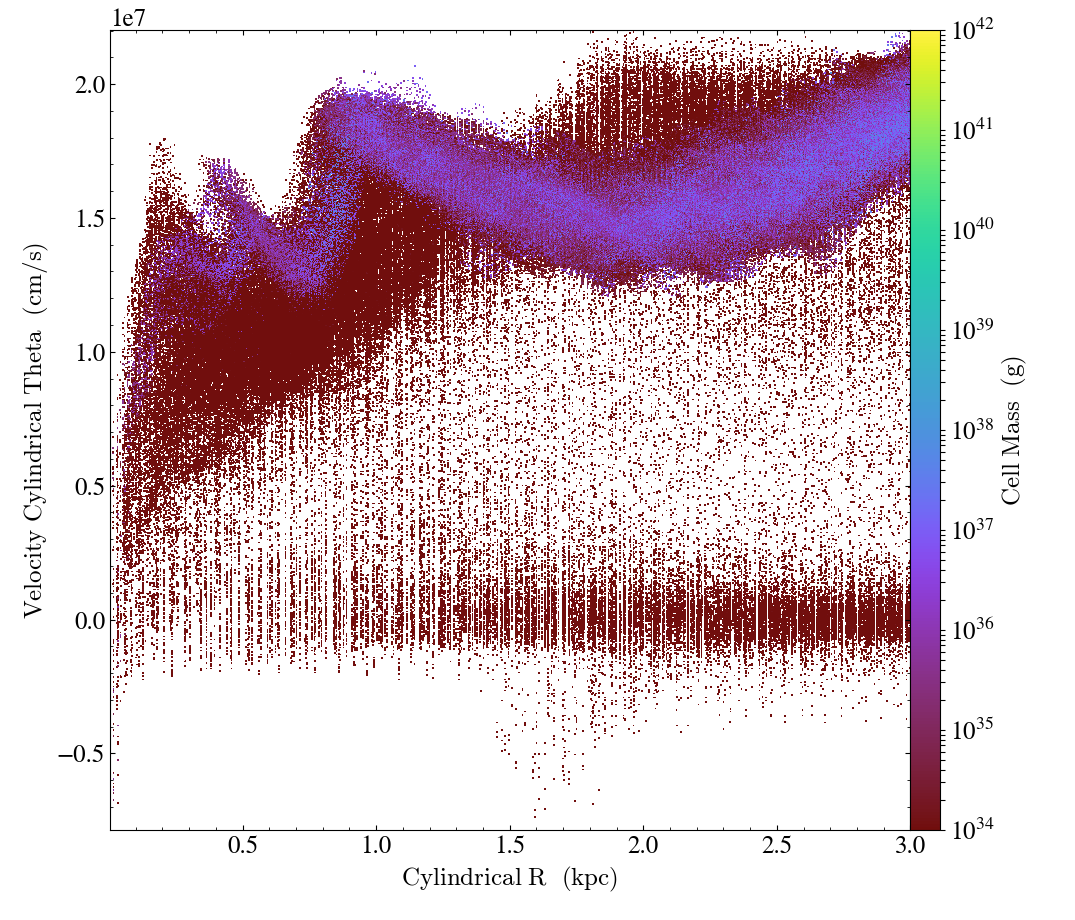

In [22]:
#Finally, the other great thing about using create_profile is n_bins:
disksmall = ds.disk([0.53,0.53,0.53],[0,0,1.0],(3,"kpc"),(5,"kpc"))
profile = yt.create_profile(disksmall,["cylindrical_r","velocity_cylindrical_theta"], 'cell_mass',n_bins=1024,weight_field=None)
histogram = profile.field_data['gas','cell_mass']
histogram[histogram < 1e34] = 0 
plot3 = yt.PhasePlot.from_profile(profile)
plot3.set_zlim('cell_mass',1e34,1e42)
plot3.set_unit("cylindrical_r","kpc")
plot3.set_log('cylindrical_r',False)
plot3.set_log('velocity_cylindrical_theta',False)